In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\Users\JO Ron\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Following are the list of algorithms that are used in this notebook.

|    Algorithm         | 
| -------------------- | 
| Logistic Regression  |
| Linear Regression|
| Decision Tree|
| Random Forest|
| XGBoost|
| AdaBoost|
| SVM|
| ANN|

In [4]:
print(df.shape)

(3276, 10)


In [5]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [9]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<AxesSubplot:>

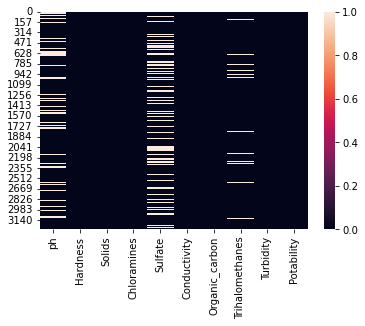

In [11]:
sns.heatmap(df.isnull())

<AxesSubplot:>

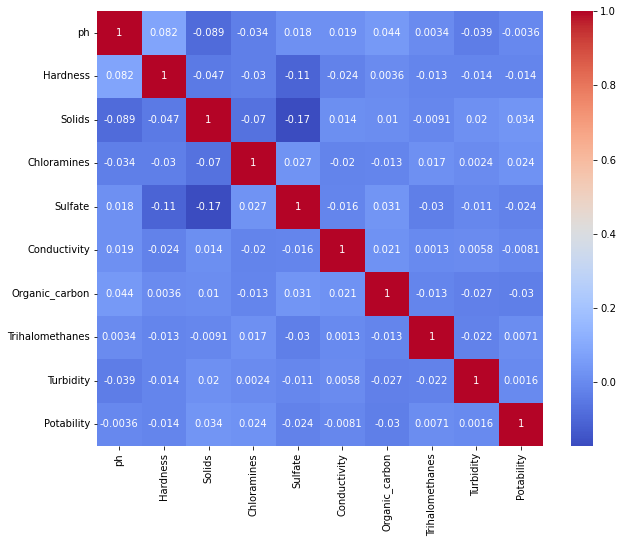

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [13]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

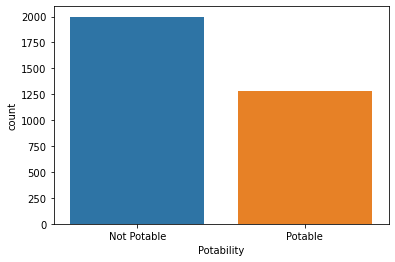

In [14]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [15]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

0    1998
1    1278
Name: Potability, dtype: int64


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

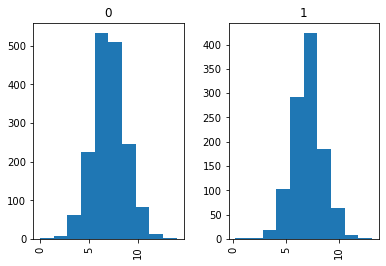

In [16]:
df.hist(column='ph', by='Potability')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

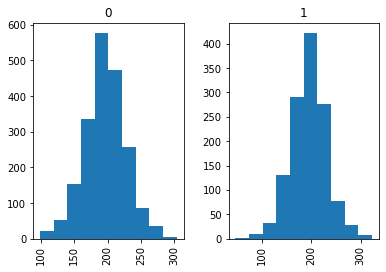

In [17]:
df.hist(column='Hardness', by='Potability')

In [18]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

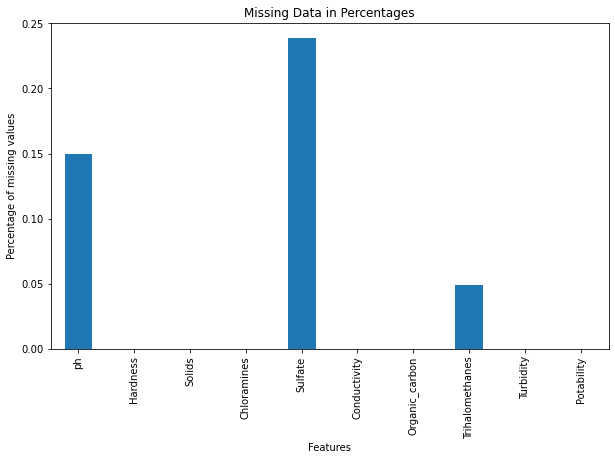

In [19]:
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [20]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [21]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [22]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [23]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [24]:
X.shape, y.shape

((3276, 9), (3276,))

In [25]:
scaler = StandardScaler()

In [26]:
X = scaler.fit_transform(X)
X

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Building

## Using Decision Tree Regressor

In [30]:
# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = tree_regressor.predict(X_test)

# Calculate evaluation metrics
dmse = mean_squared_error(y_test, predictions)
drmse = np.sqrt(dmse)
dmae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {dmse:.2f}")
print(f"Root Mean Squared Error (RMSE): {drmse:.2f}")
print(f"Mean Absolute Error (MAE): {dmae:.2f}")
#print(f"R-squared (R2): {r_squared}")

Mean Squared Error (MSE): 0.42
Root Mean Squared Error (RMSE): 0.65
Mean Absolute Error (MAE): 0.42


## Using Random Forest Regressor

In [49]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_regressor.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, predictions)
rrmse = np.sqrt(rmse)
rmae = mean_absolute_error(y_test, predictions)
#r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {rmse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rrmse:.2f}")
print(f"Mean Absolute Error (MAE): {rmae:.2f}")
#print(f"R-squared (R2): {r_squared}")

Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.46
Mean Absolute Error (MAE): 0.43


## Using XGBoost Regressor

In [56]:
# Initializing the XGBRegressor with evaluation metrics
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Training the model
xgb_regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=['rmse', 'mae'], verbose=False)

# Making predictions
predictions = xgb_regressor.predict(X_test)

# Calculating evaluation metrics
xmse = mean_squared_error(y_test, predictions)
xrmse = np.sqrt(xmse)
xmae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {xmse:.4f}")
print(f"Root Mean Squared Error (RMSE): {xrmse:.4f}")
print(f"Mean Absolute Error (MAE): {xmae:.4f}")

Mean Squared Error (MSE): 0.2126
Root Mean Squared Error (RMSE): 0.4611
Mean Absolute Error (MAE): 0.4330


## Using K Nearest Neighbors

In [63]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_regressor.predict(X_test)

# Calculating evaluation metrics
kmse = mean_squared_error(y_test, predictions)
krmse = np.sqrt(kmse)
kmae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {kmse:.4f}")
print(f"Root Mean Squared Error (RMSE): {krmse:.4f}")
print(f"Mean Absolute Error (MAE): {kmae:.4f}")

Mean Squared Error (MSE): 0.2396
Root Mean Squared Error (RMSE): 0.4895
Mean Absolute Error (MAE): 0.4155


## Using SVM

In [70]:
# Initialize the SVR (Support Vector Regression) model
svm_regressor = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the SVR model
svm_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_regressor.predict(X_test)

# Calculate evaluation metrics
smse = mean_squared_error(y_test, predictions)
srmse = np.sqrt(smse)
smae = mean_absolute_error(y_test, predictions)
#r_squared = r2_score(y_test, predictions)

print(f"MSE: {smse}")
print(f"RMSE: {srmse}")
print(f"MAE: {smae}")
#print(f"R-squared: {r_squared}")

# Additional: Calculating accuracy within a threshold (e.g., +/- 5 units)
threshold = 5
absolute_diff = abs(y_test - predictions)
accurate_predictions = sum(absolute_diff <= threshold)
accuracy = (accurate_predictions / len(y_test)) * 100
print(f"Accuracy within +/- {threshold}: {accuracy:.2f}%")

MSE: 0.3072267019153282
RMSE: 0.5542803459580072
MAE: 0.39722515361909916
Accuracy within +/- 5: 100.00%


## Using AdaBoost Classifier

In [77]:
# Initialize the AdaBoostRegressor
adaboost_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the AdaBoostRegressor model
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = adaboost_regressor.predict(X_test)

# Calculate evaluation metrics
amse = mean_squared_error(y_test, predictions)
armse = np.sqrt(amse)
amae = mean_absolute_error(y_test, predictions)
#r_squared = r2_score(y_test, predictions)

print(f"MSE: {amse}")
print(f"RMSE: {armse}")
print(f"MAE: {amae}")
#print(f"R-squared: {r_squared}")

MSE: 0.2257291154175667
RMSE: 0.4751095825360363
MAE: 0.45675796706076266


# Linear Regression

In [84]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_regressor.predict(X_test)

# Calculate evaluation metrics
lmse = mean_squared_error(y_test, predictions)
lrmse = np.sqrt(lmse)
lmae = mean_absolute_error(y_test, predictions)
#r_squared = r2_score(y_test, predictions)

print(f"MSE: {lmse}")
print(f"RMSE: {lrmse}")
print(f"MAE: {lmae}")
#print(f"R-squared: {r_squared}")

MSE: 0.2338636084905741
RMSE: 0.48359446697679875
MAE: 0.47316006022701956


# ANN

In [85]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use MSE as the loss function

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Adjust epochs and batch_size as needed

# Make predictions
predictions = model.predict(X_test)

# Calculate evaluation metrics
nnmse = mean_squared_error(y_test, predictions)
nnrmse = np.sqrt(nnmse)
nnmae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {nnmse:.4f}")
print(f"Root Mean Squared Error (RMSE): {nnrmse:.4f}")
print(f"Mean Absolute Error (MAE): {nnmae:.4f}")

34/34 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.2523
Root Mean Squared Error (RMSE): 0.5023
Mean Absolute Error (MAE): 0.4392


### Display Condenced Performance of all the models

               Model       MSE      RMSE       MAE
0  Linear Regression  0.233864  0.483594  0.473160
1      Decision Tree  0.421442  0.649185  0.421442
2      Random Forest  0.210705  0.459026  0.425943
3            XGBoost  0.212612  0.461099  0.433013
4        KNeighbours  0.239630  0.489520  0.415527
5                SVM  0.307227  0.554280  0.397225
6           AdaBoost  0.225729  0.475110  0.456758
7                ANN  0.252293  0.502288  0.439226


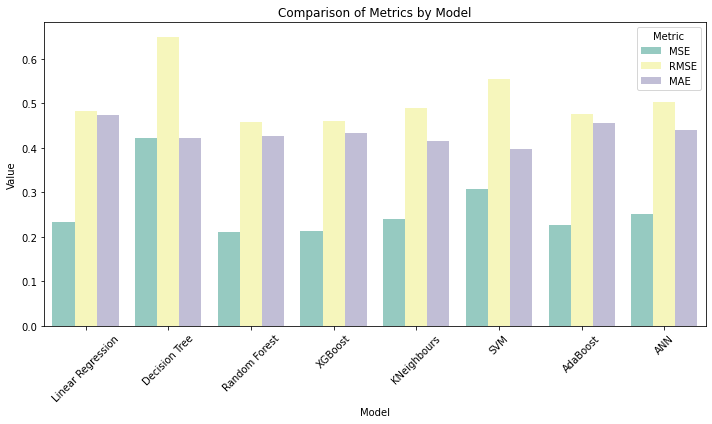

In [86]:
models = pd.DataFrame({
    'Model':['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost', 'ANN'],
    'MSE' :[lmse, dmse, rmse, xmse, kmse, smse, amse, nnmse],
    'RMSE' :[lrmse, drmse, rrmse, xrmse, krmse, srmse, armse, nnrmse],
    'MAE' :[lmae, dmae, rmae, xmae, kmae, smae, amae, nnmae]
})
print(models)

# Plotting the evaluation metrics using a bar plot
#sns.barplot(x='Model', y='MSE', data=models)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.show()

# Melt the DataFrame to reshape it for Seaborn's barplot
models_melted = models.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create a bar plot using the original DataFrame 'models'
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='Model', y='Value', hue='Metric', data=models_melted, palette='Set3')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Comparison of Metrics by Model')
plt.legend(title='Metric')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()
plt.show()